# Using the Kolmogorov-Smirnov Test for Historical Return Distributions 

Trying to understand the distribution of Ethereum (ETH), Bitcoin (BTC) & Solana (SOL) log returns across different rolling windows


In [382]:
# importing libraries

import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import skew, kurtosis, norm
import yfinance as yf
import matplotlib.pyplot as plt

In [383]:
# go to https://finance.yahoo.com/crypto/ and choose whichever tickers you want 

tickers = ["BTC-USD", "ETH-USD", "SOL-USD"]
ohlcv_data = {}

In [384]:
# choose your time period and interval (feel free to use a different API as well)
for ticker in tickers:
    temp = yf.download(ticker, period = '10y', interval='1d')
    temp.dropna(how="any",inplace=True)
    ohlcv_data[ticker] = temp

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [385]:
# general summary statistics 
for ticker, df in ohlcv_data.items():
    print(f"Summary statistics for {ticker}:")
    print(df.describe())
    print("\n")

Summary statistics for BTC-USD:
               Open          High           Low         Close     Adj Close  \
count   3419.000000   3419.000000   3419.000000   3419.000000   3419.000000   
mean   14788.255735  15133.220216  14416.489301  14799.064650  14799.064650   
std    16314.288012  16704.371466  15876.916910  16316.134729  16316.134729   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      922.123505    938.786499    913.131500    921.886505    921.886505   
50%     8305.134766   8508.429688   8138.779785   8300.860352   8300.860352   
75%    24501.357422  25134.853516  24203.311523  24603.439453  24603.439453   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  3.419000e+03  
mean   1.663620e+10  
std    1.906280e+10  
min    5.914570e+06  
25%    1.708880e+08  
50%    1.186534e+10  
75%    2.698524e+10  
max    3.509679e+11  


Summary statistics for ETH-USD:
              Open      

In [386]:
# calculating arithmetic daily returns
# I will be using log returns instead, but this may be useful depending on your objective, so I have provided the code

for ticker, df in ohlcv_data.items():
    df['Daily Return'] = df['Close'].pct_change() * 100 
    df['Daily Return'] = df['Daily Return'].shift(-1) # shifting the daily returns by one row to not have NA values
    print(f"Daily returns for {ticker}:")
    print(df['Daily Return'].head(10))
    print("\n")

Daily returns for BTC-USD:
Date
2014-09-17   -7.192558
2014-09-18   -6.984265
2014-09-19    3.573492
2014-09-20   -2.465854
2014-09-21    0.835210
2014-09-22    8.364742
2014-09-23   -2.888081
2014-09-24   -2.748309
2014-09-25   -1.736994
2014-09-26   -1.212833
Name: Daily Return, dtype: float64


Daily returns for ETH-USD:
Date
2017-11-09   -6.741069
2017-11-10    5.155507
2017-11-11   -2.152342
2017-11-12    2.860599
2017-11-13    6.603711
2017-11-14   -1.265884
2017-11-15   -0.729843
2017-11-16    0.444211
2017-11-17    4.578298
2017-11-18    1.948721
Name: Daily Return, dtype: float64


Daily returns for SOL-USD:
Date
2020-04-10   -18.320200
2020-04-11    13.605233
2020-04-12   -11.861102
2020-04-13   -14.901284
2020-04-14    -2.307510
2020-04-15     6.829797
2020-04-16    -4.355430
2020-04-17     3.082666
2020-04-18   -10.883490
2020-04-19   -11.229077
Name: Daily Return, dtype: float64




In [387]:
# calculating mean, standard deviation, skewness and kurtosis for arithmetic daily returns

for ticker, df in ohlcv_data.items():
    df['Daily Return'] = df['Close'].pct_change() * 100 
    df['Daily Return'] = df['Daily Return'].shift(-1) 
    
    daily_returns = df['Daily Return'].dropna() 

    print(f"Moments for {ticker} Daily Returns:")
    print(f"Mean: {daily_returns.mean()}")
    print(f"Standard Deviation: {daily_returns.std()}")
    print(f"Skewness: {daily_returns.skew()}")
    print(f"Kurtosis: {daily_returns.kurtosis()}")
    print("\n")

Moments for BTC-USD Daily Returns:
Mean: 0.2010844796882281
Standard Deviation: 3.6936887437804584
Skewness: -0.1391612091600366
Kurtosis: 7.56291414376041


Moments for ETH-USD Daily Returns:
Mean: 0.19948568828567054
Standard Deviation: 4.723050064643764
Skewness: -0.21254906908301896
Kurtosis: 6.107273887287471


Moments for SOL-USD Daily Returns:
Mean: 0.5910628815051633
Standard Deviation: 7.259786855858364
Skewness: 0.5110998026366427
Kurtosis: 4.8514692241339095




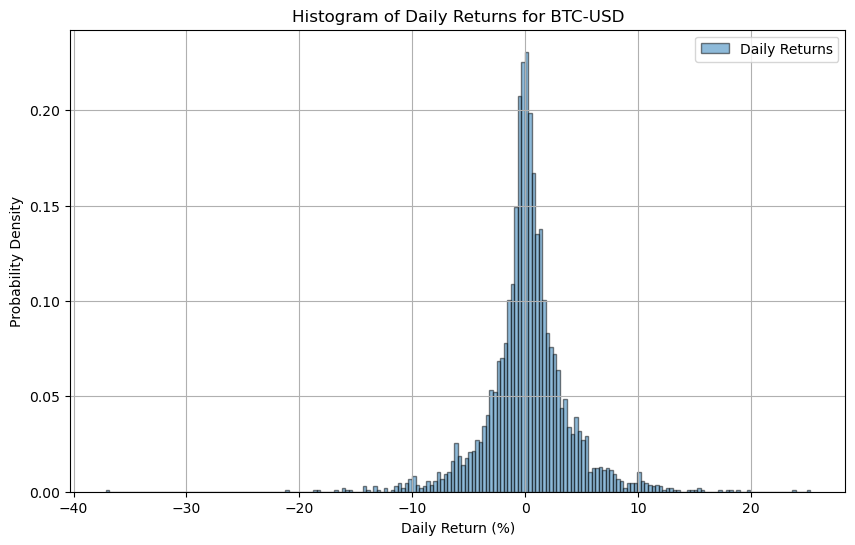

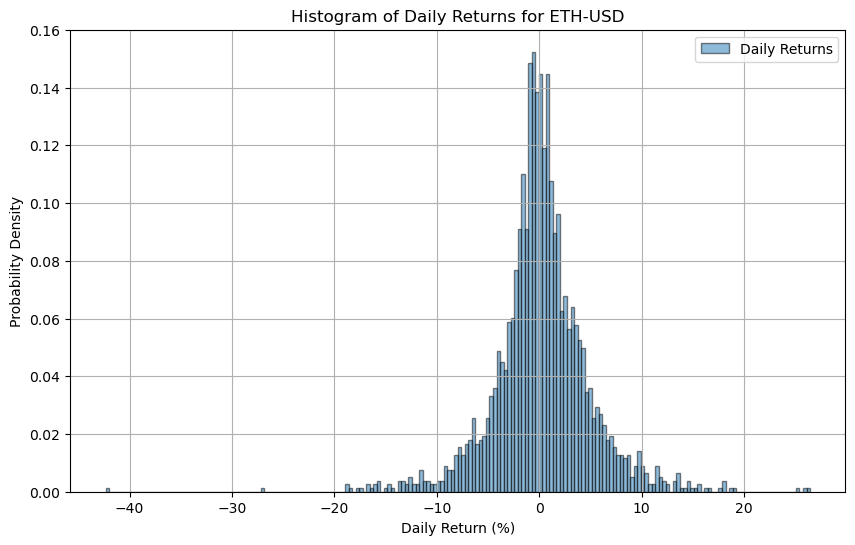

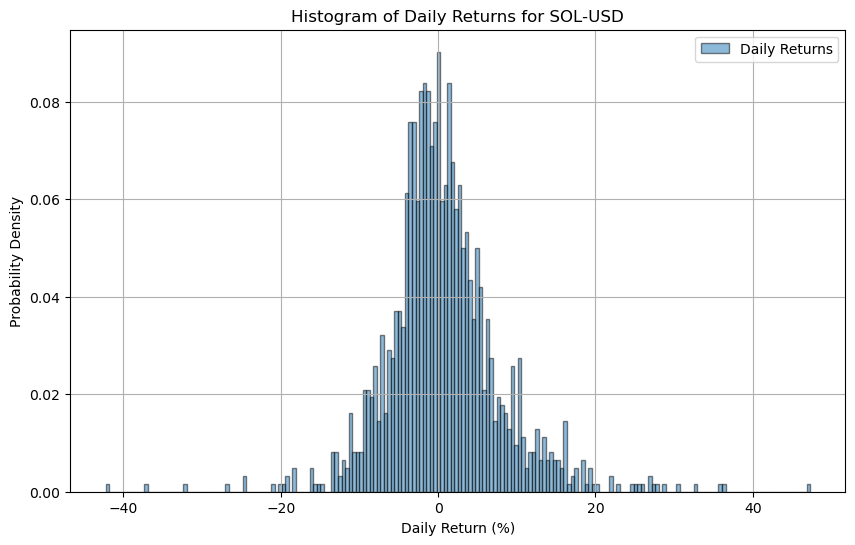

In [388]:
# plotting histogram of arithmetic daily returns for each ticker (will not be used)

for ticker, df in ohlcv_data.items():
    plt.figure(figsize=(10, 6))
    plt.hist(df['Daily Return'].dropna(), bins=200, edgecolor='black', alpha=0.5, density=True, label='Daily Returns')
    plt.title(f"Histogram of Daily Returns for {ticker}")
    plt.xlabel("Daily Return (%)")
    plt.ylabel("Probability Density")
    plt.grid(True)
    plt.legend()
    plt.show()

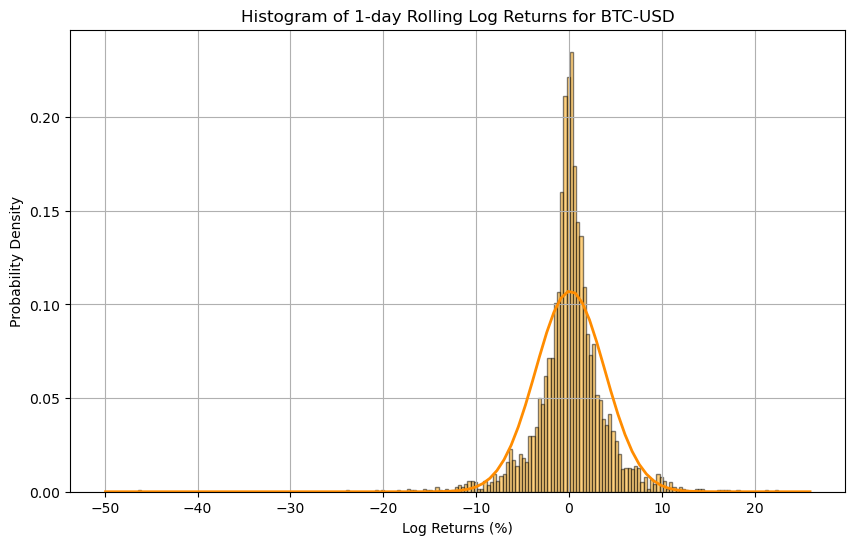

Statistics for BTC-USD Log Returns (1-day rolling):
Mean: 0.1321822311804185
Standard Deviation: 3.7225838413700063
Skewness: -0.7611347808472898
Kurtosis: 11.41106618921824




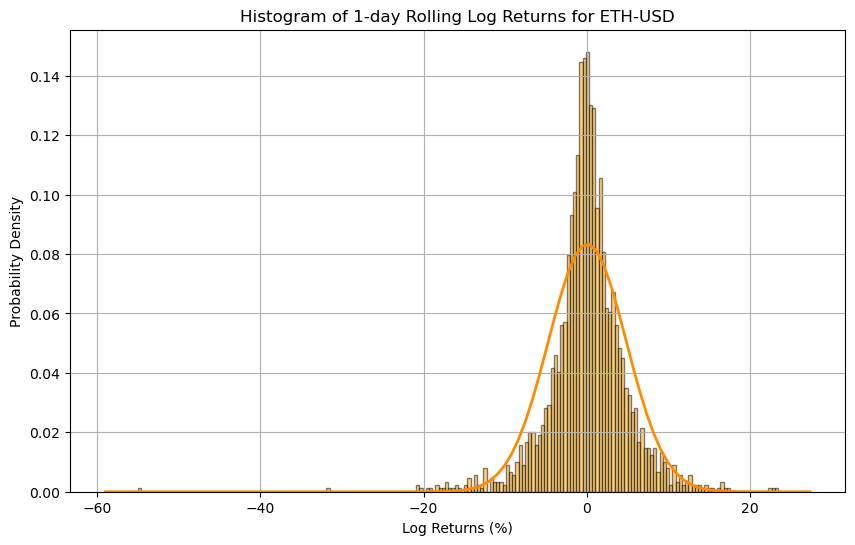

Statistics for ETH-USD Log Returns (1-day rolling):
Mean: 0.08618772029334633
Standard Deviation: 4.78798050777685
Skewness: -0.9276911817872928
Kurtosis: 10.891975253324386




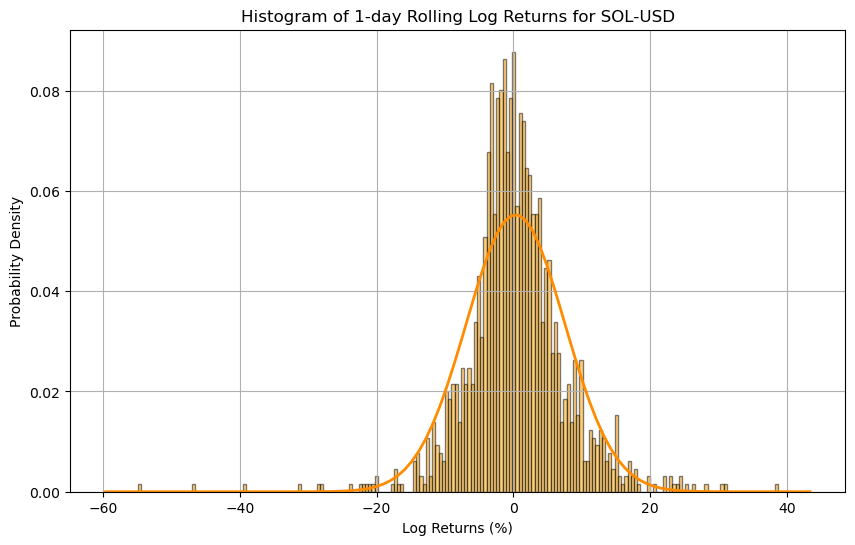

Statistics for SOL-USD Log Returns (1-day rolling):
Mean: 0.3300945413361527
Standard Deviation: 7.21756005926532
Skewness: -0.2746813617060039
Kurtosis: 6.247077181219792




In [390]:
# calculating n-day rolling mean of log returns
n = 1  # feel free to change this rolling window 

for ticker, df in ohlcv_data.items():
    df['Log Return'] = np.log(df['Close'] / df['Close'].shift(1)) * 100  
    df[f'{n}-day Rolling Log Return'] = df['Log Return'].rolling(window=n).sum()  
    log_returns = df[f'{n}-day Rolling Log Return'].dropna()

# plotting histogram of n-day rolling mean of log returns
    plt.figure(figsize=(10, 6))
    plt.hist(log_returns, bins=200, alpha=0.5, color='orange', edgecolor='black', density=True)

# calculatinb mean and standard deviation for Gaussian distribution
    mu, std = norm.fit(log_returns)

# plotting Gaussian distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, color='darkorange', linewidth=2)

    plt.title(f"Histogram of {n}-day Rolling Log Returns for {ticker}")
    plt.xlabel("Log Returns (%)")
    plt.ylabel("Probability Density")
    plt.grid(True)
    plt.show()
    
# calculating moments of log returns
    print(f"Statistics for {ticker} Log Returns ({n}-day rolling):")
    print(f"Mean: {log_returns.mean()}")
    print(f"Standard Deviation: {log_returns.std()}")
    print(f"Skewness: {log_returns.skew()}")
    print(f"Kurtosis: {log_returns.kurtosis()}")
    print("\n")

In [391]:
# defining distribution types (choose distributions from https://docs.scipy.org/doc/scipy/reference/stats.html)
distribution_types = ['norm', 't', 'laplace', 'powerlaw', 'genhyperbolic', 'invgauss']

# initialising the results list to store Kolmogorov-Smirnov test results
results = []

n = 1

for ticker, df in ohlcv_data.items():

# calculating n-day rolling mean log returns
    df['Log Return'] = np.log(df['Close'] / df['Close'].shift(1)) * 100 
    df[f'{n}-day Rolling Log Return'] = df['Log Return'].rolling(window=n).sum()  
    log_returns = df[f'{n}-day Rolling Log Return'].dropna()
    
# performing the Kolmogorov-Smirnov test on log returns
# calculating the KS-statistic, P-value & Akaike Information Criterion (AIC) for each distribution

    print(f"Kolmogorov-Smirnov Test Results for {ticker} ({n}-day rolling window log returns):")
    for distribution_type in distribution_types:
        dist_params = getattr(stats, distribution_type).fit(log_returns)
        ks_statistic, ks_pvalue = stats.kstest(log_returns, distribution_type, args=dist_params)
        distribution = getattr(stats, distribution_type)
        aic = distribution.logpdf(log_returns, *dist_params).sum() - len(dist_params)
        results.append({
            "Ticker": ticker,
            "Distribution": distribution_type,
            "KS Statistic": ks_statistic,
            "P-value": ks_pvalue,
            "AIC": aic
        })

results_df = pd.DataFrame(results)
print(results_df)

Kolmogorov-Smirnov Test Results for BTC-USD (1-day rolling window log returns):
Kolmogorov-Smirnov Test Results for ETH-USD (1-day rolling window log returns):
Kolmogorov-Smirnov Test Results for SOL-USD (1-day rolling window log returns):
     Ticker   Distribution  KS Statistic        P-value           AIC
0   BTC-USD           norm      0.105246   2.024919e-33  -9344.112585
1   BTC-USD              t      0.026213   1.792064e-02  -8819.823882
2   BTC-USD        laplace      0.036459   2.204365e-04  -8804.812722
3   BTC-USD       powerlaw      0.458323   0.000000e+00 -13378.273816
4   BTC-USD  genhyperbolic      0.014627   4.532927e-01  -8768.489113
5   BTC-USD       invgauss      0.441352   0.000000e+00 -13731.319483
6   ETH-USD           norm      0.091534   5.402983e-17  -6774.572100
7   ETH-USD              t      0.021860   2.250388e-01  -6513.931501
8   ETH-USD        laplace      0.022418   2.011799e-01  -6504.728969
9   ETH-USD       powerlaw      0.427308   0.000000e+00  -90